In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Loading Required Libraries

In [2]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 52.0 MB/s eta 0:00:00


In [3]:
!pip install mols2grid
!pip install XlsxWriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.6 MB/s eta 0:00:00


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np
import io
from PIL import Image

In [5]:
from rdkit.Chem import Descriptors
from rdkit import DataStructs
from rdkit.Chem import PandasTools
import mols2grid
from rdkit.Chem import RDConfig
import pandas as pd
import xlsxwriter
from google.colab import files
import seaborn as sns
np.random.seed(0)
pd.set_option('display.max_rows', None)

In [6]:
from pathlib import Path
from warnings import filterwarnings
# Silence some expected warnings
filterwarnings("ignore")
from sklearn import metrics
# Deep Neural network specific libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

#Loading Dataset

In [7]:
def mol2arr(mol, radi=10, nBits=2048):
    arr = np.zeros((1,))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radi, nBits)
    DataStructs.ConvertToNumpyArray(fp, arr)

    return arr

In [8]:
train2_dataset = '/content/drive/MyDrive/LogHLM-min-SDF/HLM_min_train.sdf'
train2_mols = [m for m in Chem.SDMolSupplier(train2_dataset)]
test2_dataset = '/content/drive/MyDrive/LogHLM-min-SDF/HLM_min_test.sdf'
test2_mols = [m for m in Chem.SDMolSupplier(test2_dataset)]

In [9]:
x2_train = np.array([mol2arr(m) for m in train2_mols])
y2_train = np.array([float(m.GetProp('LogHLM_min')) for m in train2_mols])

x2_test = np.array([mol2arr(m) for m in test2_mols])
y2_test = np.array([float(m.GetProp('LogHLM_min')) for m in test2_mols])

Streaming output truncated to the last 5000 lines.
[18:51:46] DEPRECATION WARNING: please use MorganGenerator
[18:51:46] DEPRECATION WARNING: please use MorganGenerator
[18:51:46] DEPRECATION WARNING: please use MorganGenerator
[18:51:46] DEPRECATION WARNING: please use MorganGenerator
[18:51:46] DEPRECATION WARNING: please use MorganGenerator
[18:51:46] DEPRECATION WARNING: please use MorganGenerator
[18:51:46] DEPRECATION WARNING: please use MorganGenerator
[18:51:46] DEPRECATION WARNING: please use MorganGenerator
[18:51:46] DEPRECATION WARNING: please use MorganGenerator
[18:51:46] DEPRECATION WARNING: please use MorganGenerator
[18:51:46] DEPRECATION WARNING: please use MorganGenerator
[18:51:46] DEPRECATION WARNING: please use MorganGenerator
[18:51:46] DEPRECATION WARNING: please use MorganGenerator
[18:51:46] DEPRECATION WARNING: please use MorganGenerator
[18:51:46] DEPRECATION WARNING: please use MorganGenerator
[18:51:46] DEPRECATION WARNING: please use MorganGenerator
[18:5

In [10]:
print("Shape of training data:", x2_train.shape)
print("Shape of test data:", x2_test.shape)

Shape of training data: (13423, 2048)
Shape of test data: (3356, 2048)


In [11]:
external_dataset = '/content/drive/MyDrive/Commercial Libraries/Enamine/Enamine_Antibacterial_Library_32000cmpds_20231212.sdf'
external_mols = [m for m in Chem.SDMolSupplier(external_dataset)]
x_external = np.array([mol2arr(m) for m in external_mols])

Streaming output truncated to the last 5000 lines.
[18:53:03] DEPRECATION WARNING: please use MorganGenerator
[18:53:03] DEPRECATION WARNING: please use MorganGenerator
[18:53:03] DEPRECATION WARNING: please use MorganGenerator
[18:53:03] DEPRECATION WARNING: please use MorganGenerator
[18:53:03] DEPRECATION WARNING: please use MorganGenerator
[18:53:03] DEPRECATION WARNING: please use MorganGenerator
[18:53:03] DEPRECATION WARNING: please use MorganGenerator
[18:53:03] DEPRECATION WARNING: please use MorganGenerator
[18:53:03] DEPRECATION WARNING: please use MorganGenerator
[18:53:03] DEPRECATION WARNING: please use MorganGenerator
[18:53:03] DEPRECATION WARNING: please use MorganGenerator
[18:53:03] DEPRECATION WARNING: please use MorganGenerator
[18:53:03] DEPRECATION WARNING: please use MorganGenerator
[18:53:03] DEPRECATION WARNING: please use MorganGenerator
[18:53:03] DEPRECATION WARNING: please use MorganGenerator
[18:53:03] DEPRECATION WARNING: please use MorganGenerator
[18:5

# Define Deep Neural Network



In [12]:
def neural_network_model(hidden1, hidden2, hidden3, hidden4, hidden5, hidden6):

    model = Sequential()
    # First hidden layer
    model.add(Dense(hidden1, activation="relu", name="layer1"))
    # Second hidden layer
    model.add(Dense(hidden2, activation="relu", name="layer2"))
    # Third hidden layer
    model.add(Dense(hidden3, activation="relu", name="layer3"))
    # Forth hidden layer
    model.add(Dense(hidden4, activation="relu", name="layer4"))
    # Forth hidden layer
    model.add(Dense(hidden5, activation="relu", name="layer5"))
    # Forth hidden layer
    model.add(Dense(hidden6, activation="relu", name="layer6"))
    # Output layer
    model.add(Dense(1, activation="linear", name="layer7"))

    # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse", "mae"])
    return model

# Train the model


In [13]:
# Neural network parameters
batch_sizes = [8, 16, 32]
nb_epoch = 50
layer1_size = 256
layer2_size = 128
layer3_size = 64
layer4_size = 32
layer5_size = 16
layer6_size = 8

In [ ]:
# Plot
fig = plt.figure(figsize=(16,8))
sns.set(color_codes=True)
for index, batch in enumerate(batch_sizes):
    fig.add_subplot(1, len(batch_sizes), index + 1)
    model = neural_network_model(layer1_size, layer2_size, layer3_size, layer4_size, layer5_size, layer6_size)

    # Fit model on x_train, y_train data
    history = model.fit(
        np.array(list((x2_train))).astype(float),
        y2_train,
        batch_size=batch,
        validation_data=(np.array(list((x2_test))).astype(float), y2_test),
        verbose=0,
        epochs=nb_epoch,
    )
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend(["train", "test"], loc="upper right")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.ylim((0, 15))
    plt.title(
        f"test loss = {history.history['val_loss'][nb_epoch-1]:.2f}, " f"batch size = {batch}"
    )
plt.show()

In [ ]:
# Save the trained model
filepath = "/content/best_weights.weights.h5"
checkpoint = ModelCheckpoint(
    str(filepath),
    monitor="loss",
    verbose=0,
    save_best_only=True,
    mode="min",
    save_weights_only=True,
)
callbacks_list = [checkpoint]

# Fit the model
model.fit(
    np.array(list((x2_train))).astype(float),
    y2_train,
    epochs=nb_epoch,
    batch_size=4,
    callbacks=callbacks_list,
    verbose=0,
)

**Save the model**

In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "LogHLM_DNN_Regression_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

**Evaluation & prediction on test set**



In [ ]:
# Evalute the model
print(f"Evaluate the model on the test data")
scores = model.evaluate(np.array(list((x2_test))), y2_test, verbose=0)
print(f" loss: {scores[0]:.2f}")
print(f" mse (same as loss): {scores[1]:.2f}")
print(f" mae: {scores[2]:.2f}")

Evaluate the model on the test data
 loss: 1.18
 mse (same as loss): 1.18
 mae: 0.51


In [ ]:
# Predict LogBB values on x_test data
y2_pred = model.predict(np.array(list((x2_test))))

# Print 5 first LogBB predicted values
first_5_prediction = [print(f"{value[0]:.2f}") for value in y2_pred[0:5]]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
-0.34
-0.34
-0.37
-2.02
-0.85


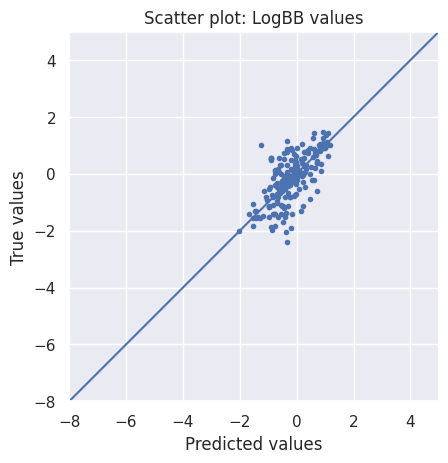

In [ ]:
# Scatter plot
limits = -8, 5
fig, ax = plt.subplots()
ax.scatter(y2_pred, y2_test, marker=".")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot: LogHLM values")
ax.set_xlim(limits)
ax.set_ylim(limits)
plt.show()

As we can see, there is a positive linear relation between the predicted and true values, but the fit is far from perfect.

#Prediction on external/unlabeled data



**load model from pickle file**

In [ ]:
with open(model_pkl_file, 'rb') as file:
    model = pickle.load(file)

In [ ]:
# Predict pIC50 values on x_test data
y2_ex_pred = model.predict(np.array(list((x_external))))

# Print 5 first pIC50 predicted values
first_5_prediction = [print(f"{value[0]:.2f}") for value in y2_ex_pred[0:5]]
y2_ex_predicted = pd.DataFrame(y2_ex_pred, columns=["predicted_LogHLM"])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
-0.32
-0.99
-0.76


# Model Interpretation

In [ ]:
from IPython.display import SVG

In [ ]:
example_mol = Chem.Mol(external_mols[0])
d2d = rdMolDraw2D.MolDraw2DSVG(500,500)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(example_mol)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [ ]:
example_fp = AllChem.GetMorganFingerprintAsBitVect(example_mol,10)
example_pred = model.predict(np.array([example_fp]))[0]
example_pred

[17:02:29] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


array([-0.31976038], dtype=float32)

In [ ]:
from rdkit.Chem.Draw import SimilarityMaps

In [ ]:
res = []
for atm in example_mol.GetAtoms():
    idx = atm.GetIdx()
    fp = SimilarityMaps.GetMorganFingerprint(example_mol,idx)
    pred_val = model.predict(np.array([fp]))[0]
    delta = example_pred - pred_val
    res.append([atm.GetSymbol(),idx,pred_val,delta])
tmp_df = pd.DataFrame(res,columns = ["Atom Type","Atom Index","Predicted Value","Delta"])
tmp_df.sort_values("Delta",ascending=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[17:02:35] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


,Atom Type,Atom Index,Predicted Value,Delta
14,C,14,[-0.81038386],[0.49062347]
10,C,10,[-0.81038386],[0.49062347]
8,C,8,[-0.7686257],[0.4488653]
1,C,1,[-0.72944355],[0.40968317]
13,C,13,[-0.72255576],[0.40279537]
11,C,11,[-0.72255576],[0.40279537]
9,C,9,[-0.72116536],[0.40140498]
12,C,12,[-0.7049383],[0.3851779]
21,C,21,[-0.7014994],[0.38173902]
0,C,0,[-0.68902767],[0.36926728]


In [ ]:
def show_png(data):
    bio = io.BytesIO(data)
    img = Image.open(bio)
    return img

def get_pred(fp, pred_function):
    fp = np.array([list(fp)])
    return pred_function(fp)[0]

def plot_similarity_map(mol, model):
    d = Draw.MolDraw2DCairo(400, 400)
    SimilarityMaps.GetSimilarityMapForModel(mol,
                                            SimilarityMaps.GetMorganFingerprint,
                                            lambda x : get_pred(x, model.predict),
                                            draw2d=d)
    d.FinishDrawing()
    return d

In [ ]:
df_ex = PandasTools.LoadSDF("External data file")

In [ ]:
external_row = 0
external_mol = df_ex.ROMol.values[external_row]
weights = SimilarityMaps.GetAtomicWeightsForModel(external_mol,
                                                   SimilarityMaps.GetMorganFingerprint,
                                                   lambda x: get_pred(x, model.predict))
def GetStandardizedWeights(weights):
  maxWeight = np.max(weights)
  weights = weights / maxWeight
  return weights, maxWeight
weights, maxWeight = GetStandardizedWeights(weights)
fig = Chem.Draw.SimilarityMaps.GetSimilarityMapFromWeights(external_mol, weights.astype(np.double))



##Cross Validation

In [ ]:
from pathlib import Path
from warnings import filterwarnings
import time
from sklearn import svm, metrics, clone
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import auc, accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt



In [ ]:
Input_df = pd.read_csv("/content/drive/MyDrive/LogMLM-min-SDF/HLM_min.csv")
Input_df.head()

In [ ]:
compound_df = Input_df.copy()

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import MACCSkeys, rdFingerprintGenerator

def smiles_to_fp(smiles, method="morgan10", n_bits=2048):
    """
    Encode a molecule from a SMILES string into a fingerprint.

    Parameters
    ----------
    smiles : str
        The SMILES string defining the molecule.

    method : str
        The type of fingerprint to use. Default is MACCS keys.

    n_bits : int
        The length of the fingerprint.

    Returns
    -------
    array
        The fingerprint array.

    """

    # convert smiles to RDKit mol object
    mol = Chem.MolFromSmiles(smiles)

    # Handle cases where SMILES string is invalid
    if mol is None:
        print(f"Warning: Invalid SMILES string: {smiles}")
        return None  # or any default value you want to use for invalid SMILES

    if method == "maccs":
        return np.array(MACCSkeys.GenMACCSKeys(mol))
    if method == "morgan2":
        fpg = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=n_bits)
        return np.array(fpg.GetFingerprint(mol))
    if method == "morgan10":
        fpg = rdFingerprintGenerator.GetMorganGenerator(radius=10, fpSize=n_bits)
        return np.array(fpg.GetFingerprint(mol))
    else:
        # NBVAL_CHECK_OUTPUT
        print(f"Warning: Wrong method specified: {method}. Default will be used instead.")
        return np.array(MACCSkeys.GenMACCSKeys(mol))

# Add column for fingerprint, handling potential None values
compound_df["fp"] = compound_df["Smiles"].apply(smiles_to_fp)
compound_df.head(3)
# NBVAL_CHECK_OUTPUT

In [ ]:
# Silence some expected warnings
filterwarnings("ignore")
# Fix seed for reproducible results
SEED = 22

In [ ]:
!pip install keras
import keras

In [ ]:
!pip install scikit-learn
import time
from sklearn.model_selection import KFold
from warnings import filterwarnings
import numpy as np
#from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
# Import mean_squared_error and r2_score from sklearn.metrics
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def model_performance(ml_model, test_x, test_y, verbose=True):
    """
    Helper function to calculate model performance for continuous targets

    Parameters
    ----------
    ml_model: sklearn model object
        The machine learning model to train.
    test_x: list
        Molecular fingerprints for test set.
    test_y: list
        Associated activity labels for test set.
    verbose: bool
        Print performance measure (default = True)

    Returns
    -------
    tuple:
        Mean squared error, R-squared on test set.
    """

    # Predict on test set
    test_pred = ml_model.predict(test_x)

    # Performance of model on test set
    mse = mean_squared_error(test_y, test_pred)


    if verbose:
        # Print performance results
        print(f"Mean squared error: {mse:.2f}")


    return mse

In [ ]:
def crossvalidation(ml_model, df, n_folds=10, verbose=False):
    """
    Machine learning model training and validation in a cross-validation loop.

    Parameters
    ----------
    ml_model: sklearn model object
        The machine learning model to train.
    df: pd.DataFrame
        Data set with SMILES and their associated activity labels.
    n_folds: int, optional
        Number of folds for cross-validation.
    verbose: bool, optional
        Performance measures are printed.

    Returns
    -------
    None

    """
    t0 = time.time()
    # Shuffle the indices for the k-fold cross-validation
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=SEED)

    # Results for each of the cross-validation folds
    mse_per_fold = []



    # Loop over the folds
    for train_index, test_index in kf.split(df):

        # Keras models can be cloned using the keras.models.clone_model function
        fold_model = keras.models.clone_model(ml_model)

        # Compile the model
        # You will likely need to customize these based on your model and data
        fold_model.compile(optimizer='adam', loss='mse', metrics=['mse'])

        # Training

        # Convert the fingerprint and the label to a list
        train_x = df.iloc[train_index].fp.tolist()
        train_y = df.iloc[train_index].logBB.tolist()

        # Convert train_x to a NumPy array with dtype float32
        train_x = np.array(train_x, dtype=np.float32)

        # Convert train_y to a NumPy array
        train_y = np.array(train_y)


        #fold_model = SVC() # this line seems to be redundant
        # Fit the model
        fold_model.fit(train_x, train_y)

        # Testing

        # Convert the fingerprint and the label to a list
        test_x = df.iloc[test_index].fp.tolist()
        test_y = df.iloc[test_index].logBB.tolist()

        # Convert test_x to a NumPy array with dtype float32
        test_x = np.array(test_x, dtype=np.float32)

        # Convert test_y to a NumPy array
        test_y = np.array(test_y)

        # Performance for each fold
        mse = model_performance(fold_model, test_x, test_y, verbose) # Changed this line to capture only the mse

        # Save results
        mse_per_fold.append(mse) # Changed this line to append only the mse



    # Print statistics of results
    print(
        f"Mean MSE: {np.mean(mse_per_fold):.2f} \t" # Changed accuracy to MSE
        f"and std : {np.std(mse_per_fold):.2f} \n"

        f"Total training time: {time.time() - t0:.2f} s"
    )

In [ ]:
crossvalidation(model, compound_df, n_folds=10)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.3348 - mse: 1.3348
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.8593 - mse: 0.8593
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6817 - mse: 0.6817
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.0415 - mse: 1.0415
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.3487 - mse: 1.3487
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.1980 - mse: 1.1980
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.0664 - mse: 1.0664
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.4814 - mse: 1.4814
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9203 - mse: 0.9203
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - lo